# Week 2: Supervised Machine Learning

In [49]:
%matplotlib notebook
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load different datasets

In [4]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()
X_columns = ['mass', 'width', 'height', 'color_score']
y_column = ['fruit_label']

X = fruits[X_columns]
y = fruits[y_column]

<IPython.core.display.Javascript object>


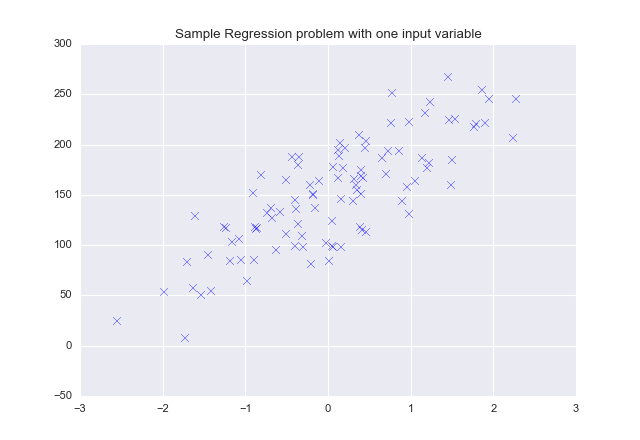

In [5]:
plt.figure()
plt.title('Sample Regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples=100, 
                             n_features=1, 
                             n_informative=1, 
                             bias=150.0, noise=30, 
                             random_state=0)

plt.scatter(X_R1, y_R1, marker="x", s=50)
plt.show()

<IPython.core.display.Javascript object>


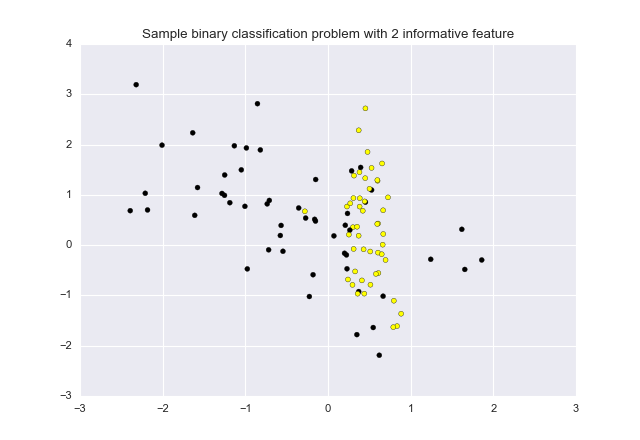

In [6]:
from sklearn.datasets import make_friedman1, make_classification
from matplotlib import cm

plt.figure()

cmap = cm.get_cmap('gnuplot')


plt.title('Sample binary classification problem with 2 informative feature')
X_C1, y_C1 = make_classification(n_samples= 100, 
                                 n_features=2,
                                 n_redundant=0, 
                                 n_informative=2,
                                 n_clusters_per_class=1, flip_y = 0.1,
                                 class_sep=0.5, random_state=0)
plt.scatter(X_C1[:,0], X_C1[:,1], c=y_C1, marker="o", cmap=cmap)


<IPython.core.display.Javascript object>


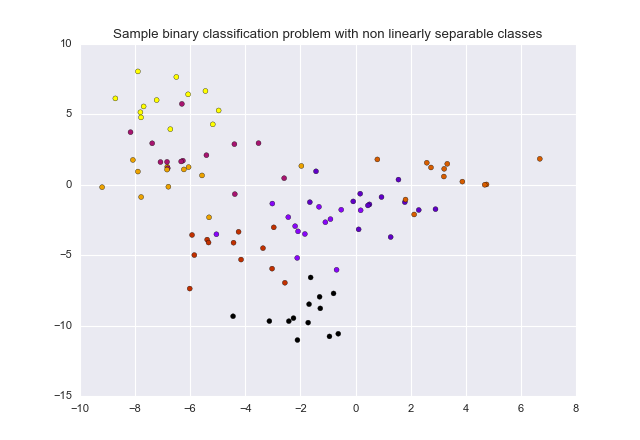

In [7]:
from sklearn.datasets import make_blobs

X_D2, y_D2 = make_blobs(n_samples=100,
                        n_features=2, 
                        centers=8,
                        cluster_std=1.3, random_state=2)

plt.figure()
plt.title('Sample binary classification problem with non linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker="o", cmap=cmap)
plt.show()

<IPython.core.display.Javascript object>


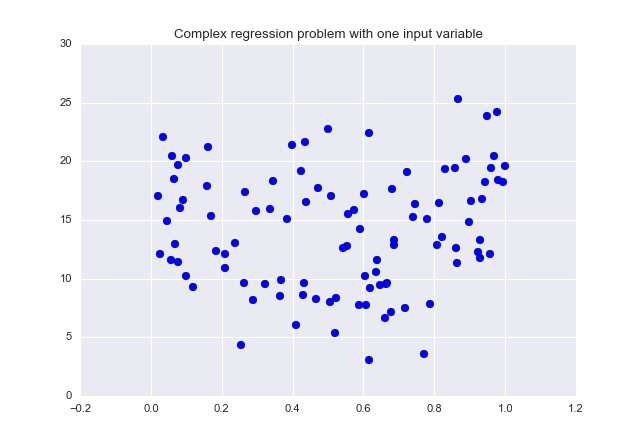

In [104]:

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

In [8]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()
(X_cancer, y_cancer) = datasets.load_breast_cancer(return_X_y = True)


## K-nearest Neighbors

<IPython.core.display.Javascript object>


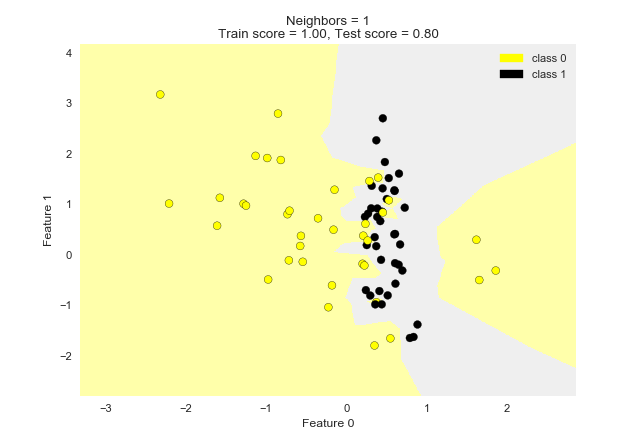

<IPython.core.display.Javascript object>


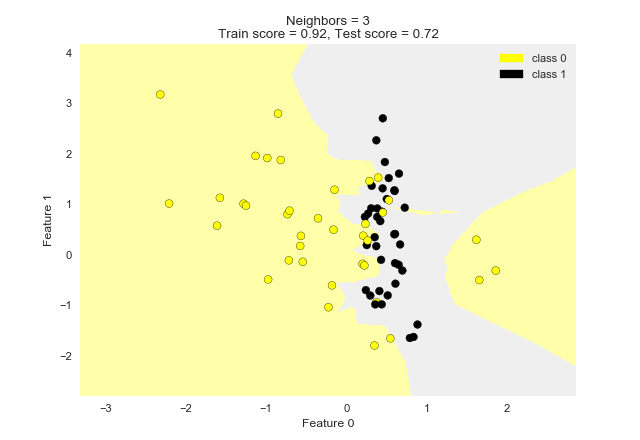

<IPython.core.display.Javascript object>


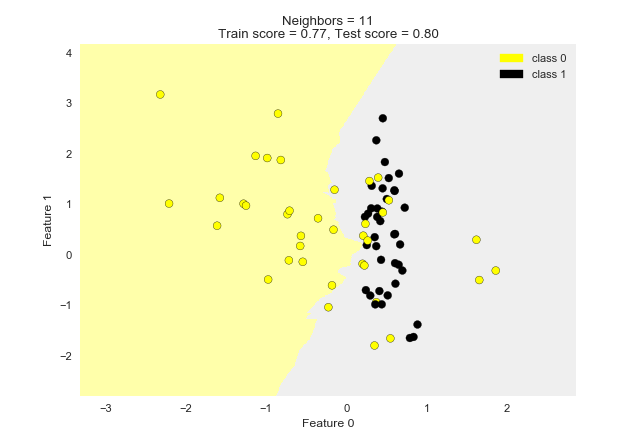

In [14]:
from adspy_shared_utilities import plot_two_class_knn


X_train, X_test, y_train, y_test = train_test_split(X_C1, y_C1, random_state=0)
plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

### Regression

<IPython.core.display.Javascript object>


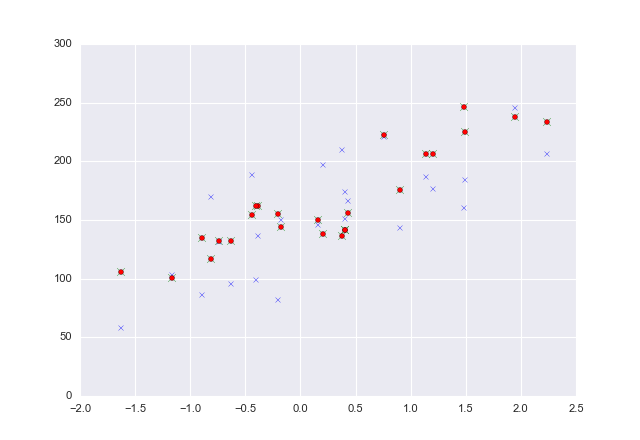

R-squared test score: 0.432


In [40]:
from sklearn.neighbors import KNeighborsRegressor

knn_r = KNeighborsRegressor(n_neighbors=2)
knn_r10 = KNeighborsRegressor(n_neighbors=10)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

knn_r.fit(X_train, y_train)
knn_r10.fit(X_train, y_train)

y_predicted = knn_r.predict(X_test)
y_predicted_10 = knn_r.predict(X_test)

plt.figure()
plt.scatter(X_test, y_test, marker='x')
plt.scatter(X_test, y_predicted_10, c='green', marker='x', s=50)

plt.scatter(X_test, y_predicted, marker='o', c='red')


print('R-squared test score: {:.3f}'.format(knn_r10.score(X_test, y_test)))

<IPython.core.display.Javascript object>


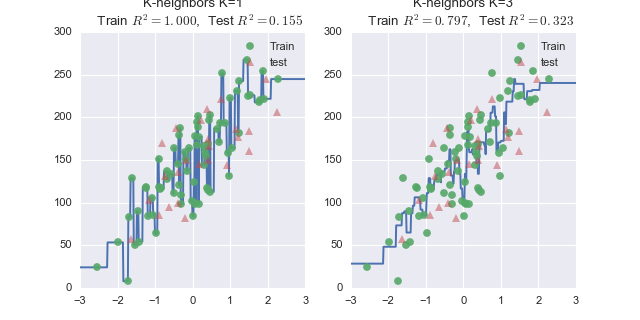

In [63]:
fig, subaxes = plt.subplots(1,2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)

for thisaxis, K in zip(subaxes, [1,3]):
    knn_reg= KNeighborsRegressor(n_neighbors=K)
    knn_reg.fit(X_train, y_train)
    y_predict = knn_reg.predict(X_predict_input)
    thisaxis.plot(X_predict_input, y_predict)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', label='test', alpha=0.5)
    thisaxis.legend()
    thisaxis.set_title('K-neighbors K={}\n\
    Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'.format(K, knn_reg.score(X_train, y_train), knn_reg.score(X_test, y_test)))
    plt.show()

Coeff: [ 45.70870465]
Intercept: 148.44575345658873
R-squared score (training): 0.679
R-squared score (training): 0.492


<IPython.core.display.Javascript object>


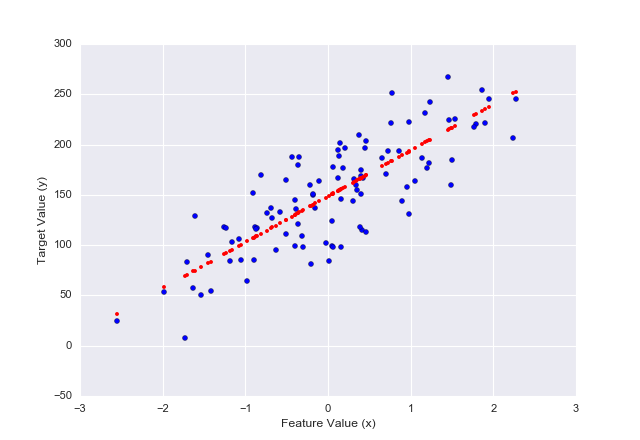

In [74]:
from sklearn.linear_model import LinearRegression


linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Coeff: {}'.format(linreg.coef_))
print('Intercept: {}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_test, y_test)))

plt.figure()
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r.')
plt.scatter(X_R1, y_R1, marker='o')
plt.xlabel('Feature Value (x)')
plt.ylabel('Target Value (y)')
plt.show()

In [102]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from adspy_shared_utilities import load_crime_dataset
(X_crime, y_crime) = load_crime_dataset()
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)

minmax = MinMaxScaler()
X_train_norm = minmax.fit_transform(X_train)
X_test_norm = minmax.transform(X_test)

ridge = Ridge(alpha=5)
ridge.fit(X_train_norm, y_train)
print('Coeff: {}'.format(ridge.coef_))
print('Intercept: {}'.format(ridge.intercept_))
print('R-squared score (training): {:.3f}'.format(ridge.score(X_train_norm, y_train)))
print('R-squared score (test): {:.3f}'.format(ridge.score(X_test_norm, y_test)))


for k in [0,1,3,5,10,20, 30, 40]:
    ridge = Ridge(alpha=k)
    ridge.fit(X_train_norm, y_train)
    print('Ridge with regularization coeff: {}'.format(k))
    #print('Coeff: {}'.format(ridge.coef_))
    #print('Intercept: {}'.format(ridge.intercept_))
    print('R-squared score (training): {:.3f}'.format(ridge.score(X_train_norm, y_train)))
    print('R-squared score (test): {:.3f}'.format(ridge.score(X_test_norm, y_test)))
    print('Number of non-zero features: {}'
     .format(np.sum(ridge.coef_ != 0)))
    print('\n')

Coeff: [  1.04811383e+02   2.64017593e+01  -6.21663113e+01  -1.82790482e+02
  -9.29987826e+01  -3.14259767e+00   9.98172472e+01   1.23991635e+02
   3.35027372e+01  -6.46044582e+01  -2.03269369e+01  -3.02143840e+02
   3.01801242e+01   5.58569336e+01  -1.59519865e+02   1.91618629e+01
   6.69555436e+01   1.12938782e+02  -4.78655044e+01  -2.19849102e+02
   1.92656606e+02   1.40154105e+01  -7.62765647e+01   5.56168088e+01
  -1.43530573e+02  -8.05169873e+01   8.50711211e+00   8.95797034e+01
   2.00466514e+02   1.86222748e+02  -5.37406875e+01   3.35266811e+01
   1.50444734e+02  -3.83653225e+02  -6.35956712e+02  -2.17382786e+02
  -1.90023142e+02   6.20662198e+01  -2.28780501e+02   1.39002454e+02
   8.47914253e+02  -3.27809357e+01   3.43748286e+01  -6.47187481e+01
  -5.39472486e+01   6.15710397e+01  -1.52199621e+01   4.70927230e-01
   6.50340334e+01   9.94874971e+01   1.30498305e+02  -1.97209656e+02
   1.01908628e+02  -1.36039781e+01   8.66222830e+01  -3.81270288e+01
   2.57047735e+01  -6.36293

/home/mathieu/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.3376447000185806e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [115]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state=0)
lasso = Lasso(alpha=1)

lasso.fit(X_train, y_train)
#print('Coeff: {}'.format(ridge.coef_))
#print('Intercept: {}'.format(ridge.intercept_))
print('R-squared score (training): {:.3f}'.format(lasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lasso.score(X_test, y_test)))
print('Number of non-zero features: {}'
 .format(np.sum(lasso.coef_ != 0)))
print('\n')

R-squared score (training): 0.103
R-squared score (test): 0.060
Number of non-zero features: 1


